<a href="https://colab.research.google.com/github/Thenujan-Nagaratnam/DataScience/blob/main/200647R_DSE_Project_Visual_Product_Recognition_Notebook_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# DSE Project - Visual Product Recognition - Notebook 1

In [1]:
!pip3 install torch==1.2.0+cu92 torchvision==0.4.0+cu92 -f https://download.pytorch.org/whl/torch_stable.html

Looking in links: https://download.pytorch.org/whl/torch_stable.html
ERROR: Could not find a version that satisfies the requirement torch==1.2.0+cu92 (from versions: 1.11.0, 1.11.0+cpu, 1.11.0+cu102, 1.11.0+cu113, 1.11.0+cu115, 1.11.0+rocm4.3.1, 1.11.0+rocm4.5.2, 1.12.0, 1.12.0+cpu, 1.12.0+cu102, 1.12.0+cu113, 1.12.0+cu116, 1.12.0+rocm5.0, 1.12.0+rocm5.1.1, 1.12.1, 1.12.1+cpu, 1.12.1+cu102, 1.12.1+cu113, 1.12.1+cu116, 1.12.1+rocm5.0, 1.12.1+rocm5.1.1, 1.13.0, 1.13.0+cpu, 1.13.0+cu116, 1.13.0+cu117, 1.13.0+cu117.with.pypi.cudnn, 1.13.0+rocm5.1.1, 1.13.0+rocm5.2, 1.13.1, 1.13.1+cpu, 1.13.1+cu116, 1.13.1+cu117, 1.13.1+cu117.with.pypi.cudnn, 1.13.1+rocm5.1.1, 1.13.1+rocm5.2, 2.0.0, 2.0.0+cpu, 2.0.0+cpu.cxx11.abi, 2.0.0+cu117, 2.0.0+cu117.with.pypi.cudnn, 2.0.0+cu118, 2.0.0+rocm5.3, 2.0.0+rocm5.4.2, 2.0.1, 2.0.1+cpu, 2.0.1+cpu.cxx11.abi, 2.0.1+cu117, 2.0.1+cu117.with.pypi.cudnn, 2.0.1+cu118, 2.0.1+rocm5.3, 2.0.1+rocm5.4.2)
ERROR: No matching distribution found for torch==1.2.0+cu92


In [2]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
import torchvision.transforms as transform

In [3]:
print(torch.__version__)

2.0.1+cu118


The followings are some of the datasets available for training our model for visual product recognition
1. Product-10k [link](https://products-10k.github.io/)
2. H&M [link](https://www.kaggle.com/competitions/h-and-m-personalized-fashion-recommendations/data)
3. Amazon Dataset [link](https://cseweb.ucsd.edu/~jmcauley/datasets/amazon_v2/)
4. Shopee [link](https://www.kaggle.com/competitions/shopee-product-matching/data)

A part of the testing dataset for visual product recognition challenge can be accessed from this [link](https://www.aicrowd.com/challenges/visual-product-recognition-challenge-2023/dataset_files)



### Downloading the Product-10k trainging dataset and extracting the archive

In [4]:
!gdown 1G_A1YCZ0p24o_h-qFtN9V48Ayk4jECD3

Downloading...
From: https://drive.google.com/uc?id=1G_A1YCZ0p24o_h-qFtN9V48Ayk4jECD3
To: /content/archive.zip
100% 19.6G/19.6G [05:46<00:00, 56.7MB/s]


In [5]:
%%capture
!unzip /content/archive.zip -d /content/training-dataset/

In [6]:
!rm /content/archive.zip

In [7]:
!mv "/content/training-dataset/train/train" "/content/"
!mv "/content/training-dataset/test/test" "/content/"

!rmdir "/content/training-dataset/train"
!rmdir "/content/training-dataset/test"

!mv "/content/train" "/content/training-dataset/"
!mv "/content/test" "/content/training-dataset/"

### Downloading the test dataset by Aicrowd and extracting the archive

In [8]:
! gdown 1OpTvvc66Olx4P2oktK40emmJ99E0h0jF

Downloading...
From: https://drive.google.com/uc?id=1OpTvvc66Olx4P2oktK40emmJ99E0h0jF
To: /content/test-archive.zip
100% 441M/441M [00:05<00:00, 73.7MB/s]


In [9]:
%%capture
!unzip /content/test-archive.zip -d /content/testing-dataset

In [10]:
!rm /content/test-archive.zip

In [11]:
!mv "/content/testing-dataset/development_test_data/gallery" "/content/"
!mv "/content/testing-dataset/development_test_data/queries/" "/content/"
!mv "/content/testing-dataset/development_test_data/gallery.csv" "/content/"
!mv "/content/testing-dataset/development_test_data/queries.csv" "/content/"

!rmdir "/content/testing-dataset/development_test_data"

!mv "/content/gallery" "/content/testing-dataset/"
!mv "/content/queries" "/content/testing-dataset/"
!mv "/content/gallery.csv" "/content/testing-dataset/"
!mv "/content/queries.csv" "/content/testing-dataset/"

## Import necessary modules

In [12]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

## Helper functions

In [13]:
def view_and_get_info_random_image(folder):
  """
  This function takes a path of a folder that contains images and
  display a random image from that folder along with its shape

  Parameters
  ----------
  folder: string
      The path of the folder with pictures (all the files within that folder should be images)

  Return
  ------
  The rendered random image
  """
  # Get a random image path
  random_image = random.sample(os.listdir(folder), 1)

  # Read in the image and plot it using matplotlib
  img = mpimg.imread(folder + random_image[0])
  plt.imshow(img)
  plt.title(folder + random_image[0])
  plt.axis("off");

  print(f"Image shape: {img.shape}") # show the shape of the image

  return img

## Analyzing the training dataset
```
File and folder structure of Product-10K dataset

training-dataset
└───train
│   |   1.jpg
│   |   2.jpg
│   |   3.jpg
│   |   4.jpg
│   
└───test
|   |   3963142.jpg
|   |   1209854.jpg
|   |   8638678.jpg
|   |   6997109.jpg
|
└───train.csv
|
└───test.csv
```

In [14]:
training_dataset_train = pd.read_csv('training-dataset/train.csv', low_memory=False)
training_dataset_test = pd.read_csv('training-dataset/test.csv', low_memory=False)

print('train.csv')
display(training_dataset_train.head())
print('\ntest.csv')
display(training_dataset_test.head())

train.csv


,name,class,group
0,1.jpg,0,0
1,2.jpg,0,0
2,3.jpg,0,0
3,4.jpg,0,0
4,5.jpg,0,0



test.csv


,name,class
0,3963142.jpg,0
1,1209854.jpg,0
2,8638678.jpg,0
3,6997109.jpg,0
4,3134887.jpg,0


Image shape: (1920, 1080, 3)


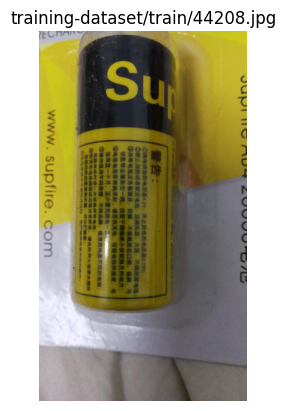

In [15]:
img = view_and_get_info_random_image('training-dataset/train/')

Image shape: (800, 800, 3)


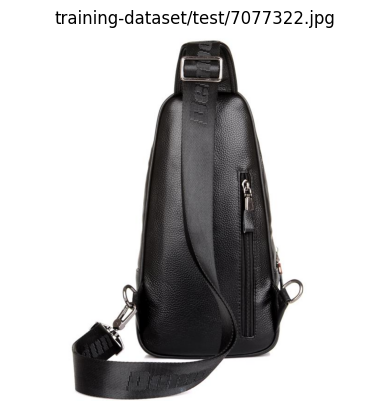

In [16]:
img = view_and_get_info_random_image('training-dataset/test/')

## Analyzing the testing dataset

```
File and folder structure of the test dataset

testing-dataset
└───gallery
│   |   ambitious-tough-teal-from-asgard.jpg
│   |   fine-shrewd-oarfish-of-genius.jpg
│   |   bold-nickel-gecko-of-reputation.jpg
│   |   marvellous-uber-boobook-of-lightning.jpg
│   
└───queries
|   |   ambitious-tough-teal-from-asgard.jpeg
|   |   free-keen-mole-of-cookies.jpeg
|   |   optimal-uptight-ringtail-of-cleaning.jpeg
|
└───gallery.csv
|
└───queries.csv
```

In [17]:
testing_dataset_gallery = pd.read_csv('testing-dataset/gallery.csv')
testing_dataset_queries = pd.read_csv('testing-dataset/queries.csv')

print('gallery.csv')
display(testing_dataset_gallery.head())
print('\nqueries.csv')
display(testing_dataset_queries.head())

gallery.csv


,seller_img_id,img_path,product_id
0,0,gallery/ambitious-tough-teal-from-asgard.jpg,5019
1,1,gallery/fine-shrewd-oarfish-of-genius.jpg,5008
2,2,gallery/bold-nickel-gecko-of-reputation.jpg,9
3,3,gallery/marvellous-uber-boobook-of-lightning.jpg,3589
4,4,gallery/bouncy-economic-agama-of-honeydew.jpg,3656



queries.csv


,user_img_id,img_path,bbox_x,bbox_y,bbox_w,bbox_h,product_id
0,0,queries/magnetic-powerful-platypus-of-hail.jpeg,0,212,740,664,5013
1,1,queries/free-keen-mole-of-cookies.jpeg,0,43,714,378,3550
2,2,queries/hilarious-precious-parakeet-of-adverti...,240,310,395,405,71
3,3,queries/optimal-uptight-ringtail-of-cleaning.jpeg,0,242,475,627,3566
4,4,queries/nonchalant-impala-of-fabulous-artistry...,350,125,150,81,5329


In [18]:
gallery_product_ids = (testing_dataset_gallery[['product_id']]).groupby('product_id').size()
queries_product_ids = (testing_dataset_queries[['product_id']]).groupby('product_id').size()

gallery_product_ids = pd.DataFrame(gallery_product_ids)
gallery_product_ids = gallery_product_ids.reset_index()
gallery_product_ids.columns = ['product_id', '# of GPT']
print('The shape of gallery_product_ids is', gallery_product_ids.shape)

queries_product_ids = pd.DataFrame(queries_product_ids)
queries_product_ids = queries_product_ids.reset_index()
queries_product_ids.columns = ['product_id', '# of queries matching the product_id']
print('The shape of queries_product_ids is', queries_product_ids.shape)

queries_and_gpt_for_queries = pd.merge(queries_product_ids, gallery_product_ids, on=['product_id'], how='inner')

print('The shape of queries_and_gpt_for_queries is', queries_and_gpt_for_queries.shape)
queries_and_gpt_for_queries.head()

The shape of gallery_product_ids is (609, 2)
The shape of queries_product_ids is (609, 2)
The shape of queries_and_gpt_for_queries is (609, 3)


,product_id,# of queries matching the product_id,# of GPT
0,0,3,3
1,1,3,4
2,2,3,1
3,3,2,2
4,4,2,2


Image shape: (1000, 800, 3)


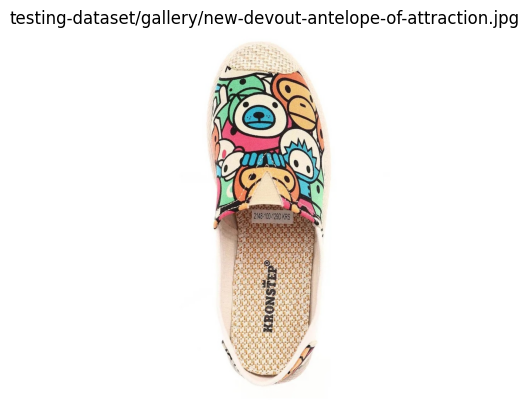

In [19]:
img = view_and_get_info_random_image('testing-dataset/gallery/')

Image shape: (1000, 700, 3)


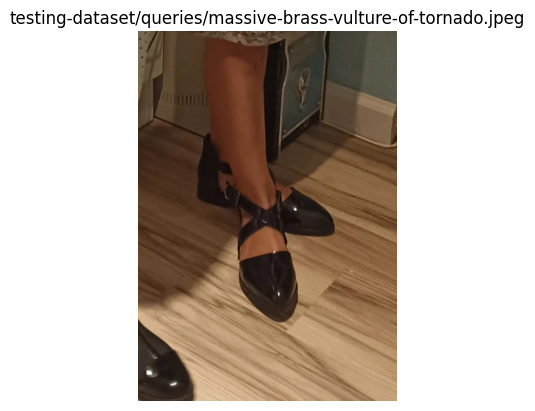

In [20]:
img = view_and_get_info_random_image('testing-dataset/queries/')

**VectoriZing and Preprocessing Data**

In [21]:
#Import the Required Libraries

import pandas as pd
from PIL import Image
import numpy as np

In [26]:
#Read the Datasets

gallery_df = pd.read_csv('testing-dataset/gallery.csv')
queries_df = pd.read_csv('testing-dataset/queries.csv')

In [27]:
!ls

sample_data  testing-dataset  training-dataset


In [28]:
# !unzip gallery.zip

In [29]:
# !unzip queries.zip

In [31]:
#Pre-process the Gallery Images - Resize the image to 224x224, Convert the image to a numpy array, Normalize pixel values to [0, 1]

gallery_images = []
for img_path in gallery_df['img_path']:
    img_path = 'testing-dataset/' + img_path
    img = Image.open(img_path)
    img = img.resize((224, 224))
    img = np.array(img)
    img = img / 255.0
    gallery_images.append(img)
gallery_images = np.array(gallery_images)

In [32]:
# Preprocess the query images - Resize the image to 224x224, Convert the image to a numpy array, Normalize pixel values to [0, 1]
query_images = []
for i, row in queries_df.iterrows():
    img_path = 'testing-dataset/' + row['img_path']
    img = Image.open(img_path)
    img = img.resize((224, 224))
    img = np.array(img)
    img = img / 255.0
    query_images.append(img)
query_images = np.array(query_images)

In [33]:
#Extract the Bounding Boxes from the Queries Dataframe
query_boxes = queries_df[['bbox_x', 'bbox_y', 'bbox_w', 'bbox_h']].values

In [34]:
#Extract Features Based on Pre-trained ResNet50 Model [ImageNet Database]

import tensorflow as tf
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input

model = ResNet50(weights='imagenet', include_top=False, pooling='avg')

gallery_features = model.predict(preprocess_input(gallery_images))

query_features = model.predict(preprocess_input(query_images))

61/61 [==============================] - 320s 5s/step


In [35]:
#Compute Cosine Similarities between the Query Features and the Gallery Features
from sklearn.metrics.pairwise import cosine_similarity

similarities = cosine_similarity(query_features, gallery_features)

In [36]:
#Rank the Gallery Images based on Similarity Scores

sorted_indices = np.argsort(similarities, axis=1)[:, ::-1]
ranked_results = sorted_indices[:, :1000]

In [37]:
#Submission.csv

submission = np.zeros((len(queries_df), 1000))
for i, indices in enumerate(ranked_results):
    submission[i, :] = gallery_df.iloc[indices]['seller_img_id'].values

np.savetxt('submission.csv', submission, delimiter=',')